In [6]:
# les packages necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
# we will try to learn from the last second
X = df.values
X = X[:,15830:15841]

In [3]:
dfy = pd.read_csv('challenge_output_data_training_file_nba_challenge.csv',sep=';')
Y = dfy.values
Y = Y[:,1]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Using Decision Tree
accuracy_train = np.zeros((11))
accuracy_test = np.zeros((11))
for i in range(1,12):
    oneTree = DecisionTreeClassifier(max_depth = i)
    oneTree.fit(X_train,Y_train)
    accuracy_train[i-1] = accuracy_score(Y_train,oneTree.predict(X_train))
    predictions = oneTree.predict(X_test)
    accuracy_test[i-1] = accuracy_score(Y_test,predictions)


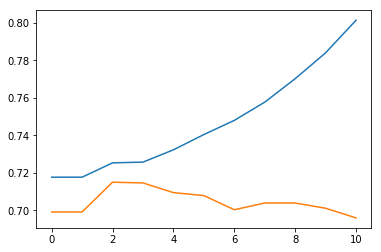

In [10]:
plt.plot(accuracy_train)
plt.plot(accuracy_test)

In [11]:
print(accuracy_test)

[0.6991256  0.6991256  0.71502385 0.71462639 0.70945946 0.70786963
 0.70031797 0.70389507 0.70389507 0.70111288 0.69594595]


In [12]:
# Learning decision tree on the whole data set
oneTreeAll = DecisionTreeClassifier(max_depth = 3)
oneTreeAll.fit(X,Y)
dfTest = pd.read_csv('test.csv')
X_Test_All = dfTest.values
X_Test_All = X_Test_All[:,15830:15841]
Y_pred_test = oneTreeAll.predict(X_Test_All)
print(Y_pred_test)

[1 0 0 ... 1 0 1]


In [13]:
X_entier = dfTest.values
Y_essai = np.array([X_entier[:,0],Y_pred_test])
Y_essai = Y_essai.T
np.savetxt('essaiUneSecondeDecisionTree.csv', Y_essai, delimiter=';',fmt='%i', header="ID;label")